# Portfolio Construction


In this Python example, we are conducting a simulation-based approach to visualize and analyze portfolio performance, focusing on constructing a large number of random portfolios and identifying the optimal portfolio based on the Sharpe ratio. This process helps in understanding the risk-return trade-off in portfolio management and the concept of the **Efficient Frontier**.

## Conceptual Overview

### 1. **Generating Random Portfolios**
   - We generate a large number of random portfolios (1,000 or 10,000) by randomly assigning weights to each asset in the portfolio.
   - The weights are normalized so that the total weight sums up to 1 (that is 100%), ensuring a fully invested portfolio.

### 2. **Calculating Portfolio Metrics**
   - For each generated portfolio, we calculate key financial metrics:
     - **Expected Return**: The weighted sum of the individual asset returns, annualized to reflect yearly performance.
     - **Volatility (Standard Deviation)**: A measure of the portfolio's risk, calculated as the annualized standard deviation of returns, using the covariance matrix of the asset returns.
     - **Sharpe Ratio**: A performance metric that measures the return per unit of risk, defined as the expected return divided by the portfolio's volatility. The Sharpe ratio helps in identifying portfolios that offer the best risk-adjusted returns.

### 3. **Identifying the Optimal Portfolio**
   - We identify the portfolio with the maximum Sharpe ratio, which represents the optimal balance between risk and return. This portfolio is commonly referred to as the "tangency portfolio" on the Efficient Frontier.

### 4. **Visialising the Efficient Frontier**
Note that we do not actually calculate the efficient frontier, but we are trying to aproximate it through by plotting all possible stock combinations.
   - We visualize all the generated portfolios on a scatter plot, with the x-axis representing portfolio volatility (risk) and the y-axis representing expected return.
   - The color of each point indicates the Sharpe ratio, allowing us to see which portfolios provide higher risk-adjusted returns.

### 5. **Highlighting the Optimal Portfolio**
   - The optimal portfolio (maximum Sharpe ratio) is highlighted with a distinct star marker (`'*'`) in red on the plot, emphasizing its position on the Efficient Frontier.

### 6. **Adding Individual Securities**
   - Each individual security (stock) is plotted separately on the scatter plot as blue dots, showing their individual risk-return characteristics.
   - Ticker labels are added next to each dot for easy identification, providing insight into how each stock compares to the constructed portfolios.

## Summary

This approach provides a comprehensive visual representation of portfolio performance, demonstrating the trade-offs between risk and return. By simulating a large number of random portfolios and identifying the one with the highest Sharpe ratio, we can better understand how to construct an optimal portfolio that maximizes returns for a given level of risk. Additionally, comparing the performance of individual securities with the constructed portfolios helps investors gauge the impact of including different assets in their portfolio.

The generated plot is a powerful tool in portfolio management, offering both theoretical insights and practical applications for investors looking to optimize their investment strategies.


## Step 0: Install and Load required packages

In [ ]:
# Run only once (and restart Kernel if needed)
# To restart kernel, from Menu -> Kernel -> Restart Kernel...
# import sys
# !{sys.executable} -m pip install riskfolio-lib

#!pip install cvxpy
#!pip install openpyxl
#!pip install yfinance
#!pip install riskfolio-lib
#!pip install quandl

# To check Riskfolio-Lin installation:
# !pip show riskfolio-lib
# dir(rp)

In [1]:
from datetime import datetime, timedelta            # needed for date and time operations and date and time maths

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd
pd.options.display.float_format = '{:.4}'.format   # display numeric values in Pandas up to 4 decimal points only

import yfinance as yf                               # for data download from YahooFinance

import warnings                                     # manage Python warnings (to mute and/or ignore)
warnings.filterwarnings("ignore")

import riskfolio as rp
import quandl

## Step 1: Select the universe of assets and time period

In the context of Portfolio Optimisation, the term **universe** refers to the set of all assets that you will consider when constructing your portfolio. Essentially, it represents the entire "pool" of investment options available to you for a specific portfolio. Selecting the universe of assets is a crucial first step in portfolio optimisation because it determines the range of opportunities and risks you can manage. The broader or more diverse the universe, the more options you have to diversify your portfolio and potentially reduce risk. However, a larger universe can also make the optimisation process more complex, as there are more combinations of assets to evaluate.

In [3]:
# Select stocks by specifying tickers of assets (check on https://au.finance.yahoo.com/)
assets = ['DELL', 'ABNB', 'PANW', 'BKNG', 'UBER', 'IBM', 'SCCO', 'ADBE',
          'NFLX', 'SAP', 'TXN', 'ORCL', 'TTD', 'MU', 'PYPL', 'INTC',
          'GOOG', 'MSFT', 'NVDA', 'AMZN', 'META', 'TSLA', 'AAPL', 'AMD', 'CRM']

# Select the time period for analysis
start = '2020-01-01'
end = '2024-07-26'

## Step 2: Download data

In [6]:
# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [8]:
# Display your data
data

,DELL,ABNB,PANW,BKNG,UBER,IBM,SCCO,ADBE,NFLX,SAP,...,INTC,GOOG,MSFT,NVDA,AMZN,META,TSLA,AAPL,AMD,CRM
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,72.88,NaN,334.4,49.1,94.9,2.06e+03,166.3,24.83,68.2,103.4,...,5.973,50.06,78.47,110.8,125.2,34.31,28.68,27.15,113.5,30.99
2020-01-03 00:00:00+00:00,72.17,NaN,331.8,48.6,93.75,2.051e+03,165.4,24.01,67.87,102.6,...,5.878,49.88,78.94,108.8,122.6,33.38,29.53,27.19,112.0,31.37
2020-01-06 00:00:00+00:00,72.74,NaN,333.7,48.39,95.14,2.033e+03,172.7,24.25,69.54,102.4,...,5.902,50.14,80.09,110.2,122.8,33.44,30.1,27.79,111.2,31.58
2020-01-07 00:00:00+00:00,72.4,NaN,333.4,48.25,95.34,2.053e+03,175.2,23.64,69.5,102.5,...,5.974,50.25,80.55,109.7,122.3,33.49,31.27,28.03,113.3,32.81
2020-01-08 00:00:00+00:00,73.57,NaN,337.9,47.83,94.6,2.048e+03,176.5,23.74,70.04,103.3,...,5.985,50.45,79.52,111.8,123.6,33.68,32.81,28.52,113.6,33.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 00:00:00+00:00,224.1,148.0,551.0,151.6,183.1,3.958e+03,247.2,125.4,179.2,181.7,...,117.9,138.6,330.9,59.33,197.2,103.2,239.2,96.01,197.8,67.31
2024-07-22 00:00:00+00:00,223.7,150.2,554.8,155.9,182.6,3.9e+03,253.7,128.3,183.1,182.6,...,123.5,140.2,333.7,60.77,200.5,103.8,251.5,100.4,204.5,67.73
2024-07-23 00:00:00+00:00,224.7,148.8,546.0,154.0,186.4,3.91e+03,255.7,125.8,183.4,182.5,...,122.6,143.1,335.6,59.71,214.8,104.5,246.4,100.9,197.0,67.52


## Step 3: Process your data

### Simple Returns vs. Log Returns

When analyzing financial time series data, it's essential to understand how returns are calculated. Two common methods are **simple returns** and **logarithmic returns** (also known as continuously compounded returns). Each method has its advantages and is suitable for different types of financial analyses.

### Simple Returns

Simple returns, or arithmetic returns, measure the percentage change in the price of an asset over a specific time period.

The simple return $R_t$ between time $t-1$ and time $t$ is calculated as:

$$
\begin{align*}
R_t &= \frac{P_t - P_{t-1}}{P_{t-1}} \\
    &= \left( \frac{P_t}{P_{t-1}} \right) - 1
\end{align*}
$$

- $P_t$: Price at time $t$
- $P_{t-1}$: Price at time $t-1$

**Interpretation**:

- Represents the **percentage change** in asset price.
- Easy to compute and interpret.
- Useful for understanding **actual returns** over a period.

**Properties**:

- **Not additive over time**: Cannot sum simple returns over multiple periods to get the total return.
- **Suitable for portfolio calculations**: Weighted average of individual asset returns gives the portfolio return.

### Log Returns

Logarithmic returns, or continuously compounded returns, use the natural logarithm of the price relatives.

The log return $r_t$ is calculated as:

$$
\begin{align*}
r_t &= \ln\left( \frac{P_t}{P_{t-1}} \right) \\
    &= \ln(P_t) - \ln(P_{t-1})
\end{align*}
$$

- $\ln$: Natural logarithm function.

**Interpretation**:

- Represents the **continuously compounded rate of return**.
- Useful for statistical analyses and modeling.
- Assumes returns are compounded continuously over time.

**Properties**:

- **Additive over time**: Sum of log returns over periods equals the log return over the total period.

  $$
  \sum_{i=1}^{n} r_i = \ln\left( \frac{P_n}{P_0} \right)
  $$

- **Symmetrical for gains and losses**: Facilitates certain mathematical operations.

### Comparison

#### Additivity

- **Simple Returns**: Not additive over time.

  $$
  \text{Total Simple Return} \neq \sum_{i=1}^{n} R_i
  $$

- **Log Returns**: Additive over time.

  $$
  \text{Total Log Return} = \sum_{i=1}^{n} r_i
  $$

#### Normality

- **Log Returns**: More likely to be normally distributed, which is advantageous for statistical modeling.

#### Small Return Approximation

- For small returns $|R_t| < 10\% $:

  $$
  R_t \approx r_t
  $$

### Converting Between Returns

#### From Simple Return to Log Return

$$
r_t = \ln(1 + R_t)
$$

#### From Log Return to Simple Return

$$
R_t = e^{r_t} - 1
$$

- $ e$: Euler's number ($\approx 2.71828$)

### Practical Example

Suppose an asset's price increases from $\$100$ to $\$105$.

#### Calculate Simple Return

$$
\begin{align*}
R_t &= \frac{105 - 100}{100} \\
    &= 0.05 \\
    &= 5\%
\end{align*}
$$

#### Calculate Log Return

$$
\begin{align*}
r_t &= \ln\left( \frac{105}{100} \right) \\
    &= \ln(1.05) \\
    &\approx 0.04879 \\
    &\approx 4.879\%
\end{align*}
$$

#### Comparison

- **Simple Return**: $5\%$
- **Log Return**: $4.879\%$
- The difference is minimal for small percentage changes.

### When to Use Each Method

#### Simple Returns

- **Portfolio Management**: Easier to calculate portfolio returns as weighted sums.
- **Short-term Analysis**: Suitable when dealing with small time intervals or small returns.

#### Log Returns

- **Statistical Modeling**: Preferred when applying statistical techniques that assume normality.
- **Time Series Analysis**: Additivity over time simplifies calculations for multi-period returns.
- **Large Returns**: Better handles extreme changes in asset prices.

### Summary

- **Simple Returns** are straightforward and intuitive but lack certain mathematical properties.
- **Log Returns** offer mathematical convenience, especially for statistical analyses, due to their additive nature and tendency toward normality.

Understanding the differences and appropriate applications of simple and log returns is crucial for accurate financial analysis and modeling.

---

*Note: Always consider the context of your analysis when choosing between simple and log returns. For precise financial modeling, especially over multiple periods, log returns may provide better analytical properties.*


In [11]:
# Calculating simple returns returns
ret = data[assets].pct_change().dropna()

In [13]:
ret

,DELL,ABNB,PANW,BKNG,UBER,IBM,SCCO,ADBE,NFLX,SAP,...,INTC,GOOG,MSFT,NVDA,AMZN,META,TSLA,AAPL,AMD,CRM
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-11 00:00:00+00:00,-0.006735,-0.03773,-0.002013,-0.0001091,0.004814,-0.00744,-0.002243,-0.007206,0.003628,-0.005522,...,0.003161,0.019,0.006691,-0.005944,-0.01748,0.009971,-0.02724,0.009329,-0.00858,-0.03165
2020-12-14 00:00:00+00:00,-0.005147,-0.06643,0.02208,0.03415,0.01301,-0.0111,-0.00517,0.01103,-0.01218,-0.005955,...,0.02271,0.002475,0.01404,0.03144,0.003806,-0.008869,0.04892,-0.004017,-0.003051,-0.02223
2020-12-15 00:00:00+00:00,0.05009,-0.04,-0.007771,0.02469,0.002582,0.01551,-0.005062,0.01809,0.004381,0.01943,...,0.003888,0.0181,0.01009,0.003669,0.01451,0.02195,-0.01028,0.01161,0.01411,-0.008939
2020-12-16 00:00:00+00:00,-0.0005476,0.1057,0.01504,-0.00278,0.02396,0.0003147,0.01576,0.001763,-0.002698,-0.003017,...,-0.008832,0.01487,0.01852,0.03881,0.01568,0.02049,-0.01655,0.007062,-0.001601,-0.01
2020-12-17 00:00:00+00:00,0.006964,0.06566,0.01115,-0.0001033,-0.001506,0.007014,0.01029,0.01137,-0.008565,0.0,...,0.007457,0.01322,0.02496,0.02307,0.02936,0.01846,0.0532,0.002852,0.003516,0.002773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 00:00:00+00:00,0.0005799,0.007557,-0.01051,-0.0269,-0.003374,0.009335,0.001132,0.00359,0.0009485,-0.01064,...,-0.0261,0.00384,0.02164,-0.01117,-0.0001013,0.003078,-0.04024,0.00303,-0.03288,0.01585
2024-07-22 00:00:00+00:00,-0.00156,0.0148,0.006933,0.0283,-0.003167,-0.01458,0.02605,0.02345,0.02207,0.004911,...,0.04757,0.01162,0.008492,0.02427,0.01653,0.005753,0.05146,0.04614,0.03405,0.00624
2024-07-23 00:00:00+00:00,0.004688,-0.009522,-0.01588,-0.012,0.02114,0.002507,0.007793,-0.01906,0.001364,-0.0002715,...,-0.00769,0.02097,0.005574,-0.01744,0.07128,0.007531,-0.0204,0.00458,-0.03687,-0.003101


In [15]:
# Calculating log returns
def log_returns(list_stock_prices):
    return np.log(list_stock_prices).diff().dropna()

In [17]:
ret = log_returns(data[assets])
ret

,DELL,ABNB,PANW,BKNG,UBER,IBM,SCCO,ADBE,NFLX,SAP,...,INTC,GOOG,MSFT,NVDA,AMZN,META,TSLA,AAPL,AMD,CRM
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-11 00:00:00+00:00,-0.006758,-0.03846,-0.002015,-0.0001091,0.004802,-0.007468,-0.002246,-0.007232,0.003621,-0.005537,...,0.003156,0.01882,0.006669,-0.005962,-0.01763,0.009922,-0.02762,0.009286,-0.008617,-0.03216
2020-12-14 00:00:00+00:00,-0.00516,-0.06874,0.02184,0.03358,0.01293,-0.01117,-0.005184,0.01097,-0.01226,-0.005973,...,0.02245,0.002472,0.01394,0.03096,0.003799,-0.008908,0.04776,-0.004025,-0.003056,-0.02248
2020-12-15 00:00:00+00:00,0.04888,-0.04082,-0.007801,0.02439,0.002578,0.01539,-0.005075,0.01792,0.004371,0.01924,...,0.003881,0.01794,0.01004,0.003662,0.0144,0.02171,-0.01034,0.01154,0.01402,-0.008979
2020-12-16 00:00:00+00:00,-0.0005477,0.1005,0.01493,-0.002784,0.02368,0.0003146,0.01564,0.001761,-0.002702,-0.003022,...,-0.008871,0.01476,0.01835,0.03807,0.01556,0.02028,-0.01669,0.007037,-0.001602,-0.01005
2020-12-17 00:00:00+00:00,0.00694,0.06359,0.01108,-0.0001033,-0.001507,0.006989,0.01023,0.01131,-0.008602,0.0,...,0.007429,0.01313,0.02465,0.0228,0.02894,0.01829,0.05183,0.002848,0.00351,0.002769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 00:00:00+00:00,0.0005797,0.007529,-0.01056,-0.02727,-0.00338,0.009291,0.001131,0.003584,0.0009481,-0.01069,...,-0.02644,0.003832,0.02141,-0.01123,-0.0001014,0.003073,-0.04108,0.003025,-0.03344,0.01572
2024-07-22 00:00:00+00:00,-0.001561,0.01469,0.006909,0.02791,-0.003172,-0.01469,0.02571,0.02318,0.02183,0.004899,...,0.04647,0.01155,0.008456,0.02398,0.0164,0.005736,0.05018,0.04511,0.03349,0.00622
2024-07-23 00:00:00+00:00,0.004677,-0.009567,-0.01601,-0.01207,0.02092,0.002504,0.007763,-0.01924,0.001363,-0.0002715,...,-0.00772,0.02076,0.005558,-0.0176,0.06886,0.007503,-0.02061,0.004569,-0.03756,-0.003105


## Random Search of Optiomal Portfolio

Optimal Portfolio in this case will be the portfolio with max Sharpe Ratio.

**Generating Random Weights:**

- `np.random.random(len(assets))` creates an array of random numbers, each between 0 and 1. The number of random values generated is equal to the number of assets you have. This step simulates random allocations to each asset in the portfolio.

**Normalization:**

- `np.sum(weights)` calculates the sum of all the random values generated in the first step.
- `weights / np.sum(weights)` scales each value in the weights array by dividing it by the total sum of the weights. This step ensures that all the scaled values add up to 1 (or 100% when expressed as percentages), making them valid portfolio weights.

**Purpose:**
The purpose of the code below is to **randomly allocate investment weights** across assets such that the entire portfolio is fully invested (i.e., the sum of weights equals 1). This is often used in simulations, testing, or as a starting point for optimization algorithms.

In [20]:
# Optimization method - Randomization (Generate random weights for the assets)

# np.random.seed(200) # if disabled, each run of the randomization will result in random weights

# Step 1: Generate random weights
# np.random.random(len(assets)) generates an array of random numbers 
# between 0 and 1. The length of the array is equal to the number of assets.
weights = np.array(np.random.random(len(assets)))

# Step 2: Normalize the weights so that they sum to 1
# weights / np.sum(weights) scales the random weights so that their total sum is 1.
# This ensures that the weights represent proportions of the total investment 
# (e.g., percentages) that add up to 100%.
weights = weights / np.sum(weights)

# Step 3: Display results
df_weights = pd.DataFrame({
    'Stock': assets,
    'Weight': weights
})
df_weights['Weight'] = df_weights['Weight'].apply(lambda x: f"{x:.2%}") # apply percentage formatting to weights column

# Display the DataFrame
df_weights

,Stock,Weight
0,DELL,4.48%
1,ABNB,3.82%
2,PANW,1.64%
3,BKNG,1.96%
4,UBER,3.80%
5,IBM,0.98%
6,SCCO,3.87%
7,ADBE,5.92%
8,NFLX,5.45%
9,SAP,5.79%


Calculating the asset log daily returns, covariance, expected annual return/volatility, and Sharpe ratio

In [23]:
expected_return = np.sum((ret.mean()* weights) * 252)
expected_vol = np.sqrt(np.dot(weights.T,np.dot(ret.cov()*252,weights)))
sharpe_r = expected_return/expected_vol

# Print the results in a nicely formatted way
print(f"Expected Annual Return: {expected_return:.2%}")
print(f"Expected Annual Volatility (Standard Deviation): {expected_vol:.2%}")
print(f"Sharpe Ratio: {sharpe_r:.2f}")

Expected Annual Return: 17.11%
Expected Annual Volatility (Standard Deviation): 25.51%
Sharpe Ratio: 0.67


### Large simulation and Finding max Sharpe ratio

In [26]:
np.random.seed(200)

# Initalization of variables
portfolio_number = 10000
weights_total = np.zeros((portfolio_number,len(ret.columns)))
returns = np.zeros(portfolio_number)
volatility = np.zeros(portfolio_number)
sharpe = np.zeros(portfolio_number)

for i in range(portfolio_number):

    # Random weights
    weights = np.array(np.random.random(len(ret.columns)))
    weights = weights/np.sum(weights)
    
    # Append weight
    weights_total[i,:] = weights

    # Expected return
    returns[i] = np.sum((ret.mean()* weights) * 252)

    # Expected volume
    volatility[i] = np.sqrt(np.dot(weights.T,np.dot(ret.cov()*252,weights)))

    # Sharpe ratio
    sharpe[i] = returns[i]/volatility[i]

# Find the portfolio with the maximum Sharpe ratio
max_sharpe = sharpe.max()
max_sharpe_index = sharpe.argmax() # find the location where the max Sharpe portfolio is

max_sharpe_weights = weights_total[max_sharpe_index,:]
max_sharpe_return = returns[max_sharpe_index]
max_sharpe_vol = volatility[max_sharpe_index]

# Calculate individual security returns and volatility
individual_returns = ret.mean() * 252
individual_volatility = np.sqrt(np.diag(ret.cov() * 252))

### Visualising random portfolios

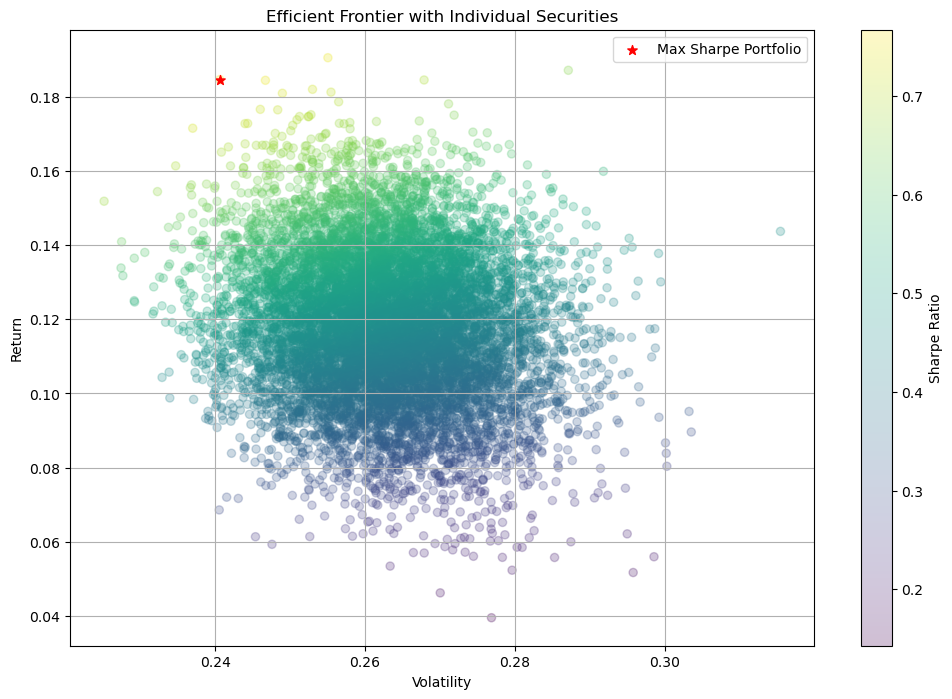

In [29]:
plot_inddividual_stocks=False # Do you want to include individual stocks in your plot or only portfolios?


plt.figure(figsize=(12,8))
plt.scatter(volatility, returns, c=sharpe, s=35, alpha = 0.25, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.grid()

# Highlight the portfolio with the maximum Sharpe ratio
plt.scatter(max_sharpe_vol,max_sharpe_return, c='red', s=50, marker='*', label='Max Sharpe Portfolio')

# Plot individual securities with ticker labels
if plot_inddividual_stocks:
    plt.scatter(individual_volatility, individual_returns, c='blue', s=50, alpha = 0.5, label='Individual Securities')
    for ticker, x, y in zip(ret.columns, individual_volatility, individual_returns):
        plt.text(x, y, ticker, fontsize=9, ha='right', va='bottom')

# Add a legend
plt.legend()
plt.title('Efficient Frontier with Individual Securities')
plt.show()